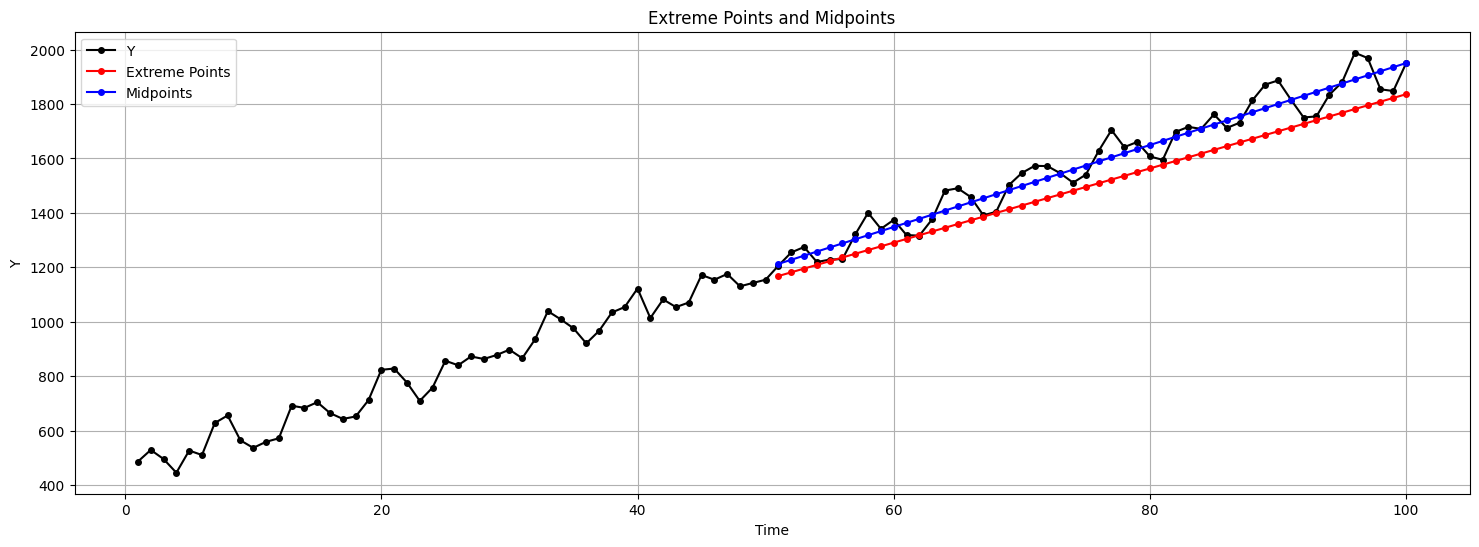

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.signal import correlate

Y = np.array([486.59, 529.13, 495.84, 445.47, 526.9, 510.54, 628.13, 655.8, 564.43, 536.79,
               559.02, 571.96, 691.59, 683.62, 704.56, 664.42, 643.03, 652.22, 712.13, 823.54,
               828.2, 776.72, 709.32, 758.34, 856.78, 840.26, 872.64, 863.3, 877.9, 897.5,
               866.14, 935.31, 1039, 1009.1, 976.14, 920.65, 966.7, 1034.2, 1054.2, 1122.2,
               1013.8, 1082.2, 1053.9, 1070.8, 1172, 1154.4, 1175.7, 1130.3, 1142.6, 1154.5,
               1206.3, 1254.7, 1274.7, 1219.7, 1228.3, 1230.5, 1321.2, 1400.3, 1341.5, 1374.5,
               1318.5, 1316.5, 1376.6, 1482, 1490.5, 1458.7, 1391, 1404.3, 1502.7, 1546.6,
               1572.9, 1572, 1545.7, 1511, 1540.7, 1627.8, 1704.3, 1641.7, 1660.5, 1607.4,
               1594.9, 1697.5, 1716.1, 1708.6, 1762, 1712, 1731.3, 1813.7, 1871.4, 1886.6,
               1816.6, 1750.5, 1754.7, 1833.7, 1880.1, 1988.5, 1968.9, 1854.1, 1847.8, 1950
               ])

N = len(Y)
N2 = N // 2

t = np.arange(1, N + 1)  # Define the time series

# Method of extreme points and midpoints

# Extreme points method
b1 = (Y[N2 - 1] - Y[0]) / (t[N2 - 1] - t[0])
b0 = Y[0] - b1 * t[0]
Y_extreme = b0 + b1 * t

# Midpoints method
t1 = np.mean(t[: N2 // 2])
t2 = np.mean(t[N2 // 2 : N2])
y1 = np.mean(Y[: N2 // 2])
y2 = np.mean(Y[N2 // 2 : N2])
a1 = (y2 - y1) / (t2 - t1)
a0 = y1 - a1 * t1
Y_midpoints = a0 + a1 * t

# Plotting Extreme and Midpoint Methods
plt.figure(1, figsize=(18, 6))
plt.plot(t, Y, "k-o", label="Y", markersize=4)
plt.plot(t[N2:], Y_extreme[N2:], "r-o", label="Extreme Points", markersize=4)
plt.plot(t[N2:], Y_midpoints[N2:], "b-o", label="Midpoints", markersize=4)
# plt.plot(t, Y_extreme, 'r-o', label='Extreme Points', markersize=4)
# plt.plot(t, Y_midpoints, 'b-o', label='Midpoints', markersize=4)
plt.title("Extreme Points and Midpoints")
plt.grid(True)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

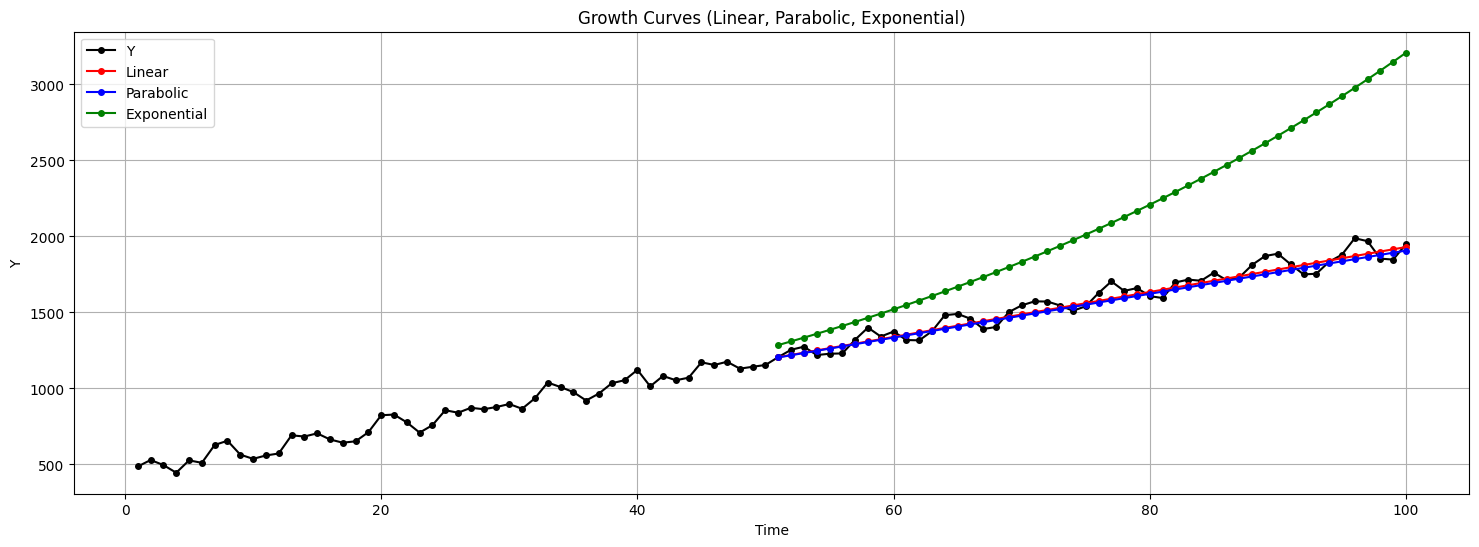

In [81]:
# Growth Curves (Linear, Parabolic, Exponential)

T = np.arange(-(N2 - 1), N2, 2)  # Shift time for known data
T_progn = np.arange(N2 + 1, N2 + N2 * 2 + 1, 2)  # Future times for prediction

# Linear model
a0 = np.mean(Y[:N2])
a1 = np.sum(Y[:N2] * T) / np.sum(T**2)
Y_linear = a0 + a1 * T_progn

# Parabolic model
a2 = (N2 * np.sum(Y[:N2] * T**2) - np.sum(T**2) * np.sum(Y[:N2])) / (
    N2 * np.sum(T**4) - (np.sum(T**2)) ** 2
)
a0_parab = np.mean(Y[:N2]) - (np.mean(T**2)) * a2
Y_parabolic = a0_parab + a1 * T_progn + a2 * T_progn**2

# Exponential model
A = np.mean(np.log(Y[:N2]))
B = np.sum(np.log(Y[:N2]) * T) / np.sum(T**2)
Y_exponential = np.exp(A) * np.exp(B) ** T_progn

# Plotting Growth Models
plt.figure(2, figsize=(18, 6))
plt.plot(t, Y, "k-o", label="Y", markersize=4)

prediction_range = t[N2 : N2 + len(Y_linear)]
plt.plot(prediction_range, Y_linear, "r-o", label="Linear", markersize=4)
plt.plot(prediction_range, Y_parabolic, "b-o", label="Parabolic", markersize=4)
plt.plot(prediction_range, Y_exponential, "g-o", label="Exponential", markersize=4)

plt.grid(True)
plt.title("Growth Curves (Linear, Parabolic, Exponential)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

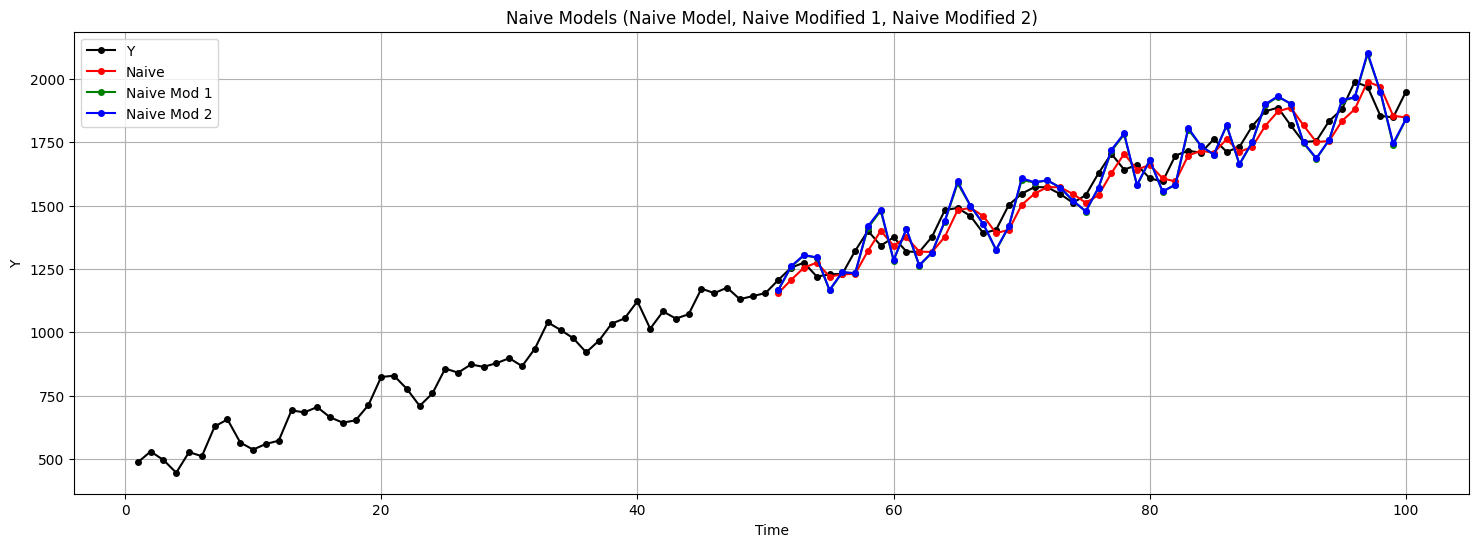

In [82]:
# Naive Models

# Naive model
Y_naive = Y[N2 - 1 : N - 1]

# Naive modified 1
Y_naive_mod1 = Y[N2 - 1 : N - 1] + (Y[N2 - 1 : N - 1] - Y[N2 - 2 : N - 2])

# Naive modified 2
Y_naive_mod2 = Y[N2 - 1 : N - 1] * (Y[N2 - 1 : N - 1] / Y[N2 - 2 : N - 2])

# Plotting Naive Models
plt.figure(3, figsize=(18, 6))
plt.plot(t, Y, "k-o", label="Y", markersize=4)
plt.plot(t[N2:], Y_naive, "r-o", label="Naive", markersize=4)
plt.plot(t[N2:], Y_naive_mod1, "g-o", label="Naive Mod 1", markersize=4)
plt.plot(t[N2:], Y_naive_mod2, "b-o", label="Naive Mod 2", markersize=4)
plt.grid(True)
plt.title("Naive Models (Naive Model, Naive Modified 1, Naive Modified 2)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

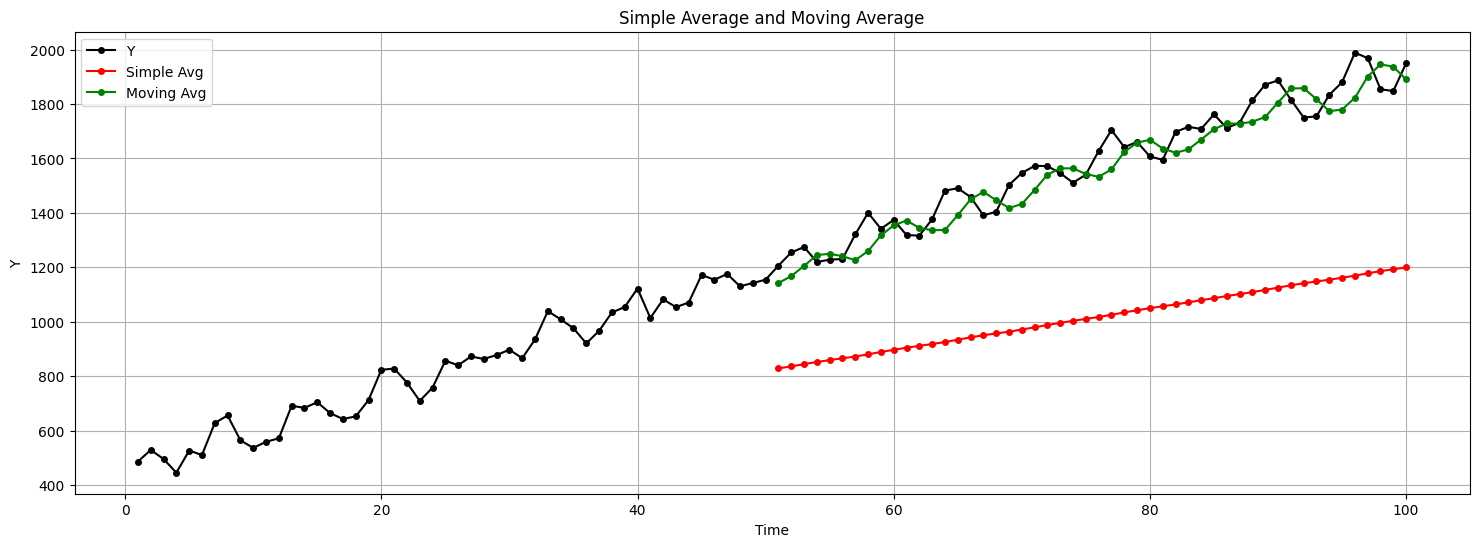

In [83]:
# Simple and Moving Averages

# Simple averages
Y_simple_avg = np.copy(Y)
for i in range(N2 - 1, N - 1):
    Y_simple_avg[i + 1] = np.mean(Y[: i + 1])

# Moving averages
Y_moving_avg = np.copy(Y)
for i in range(N2 - 1, N - 1):
    Y_moving_avg[i + 1] = np.mean(Y[i - 2 : i + 1])

# Plotting Averages
plt.figure(4, figsize=(18, 6))
plt.plot(t, Y, "k-o", label="Y", markersize=4)
plt.plot(t[N2:], Y_simple_avg[N2:], "r-o", label="Simple Avg", markersize=4)
plt.plot(t[N2:], Y_moving_avg[N2:], "g-o", label="Moving Avg", markersize=4)
# plt.plot(t[1:], Y_simple_avg[1:], 'r-o', label='Simple Avg', markersize=4)
# plt.plot(t[1:], Y_moving_avg[1:], 'g-o', label='Moving Avg', markersize=4)
plt.grid(True)
plt.title("Simple Average and Moving Average")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

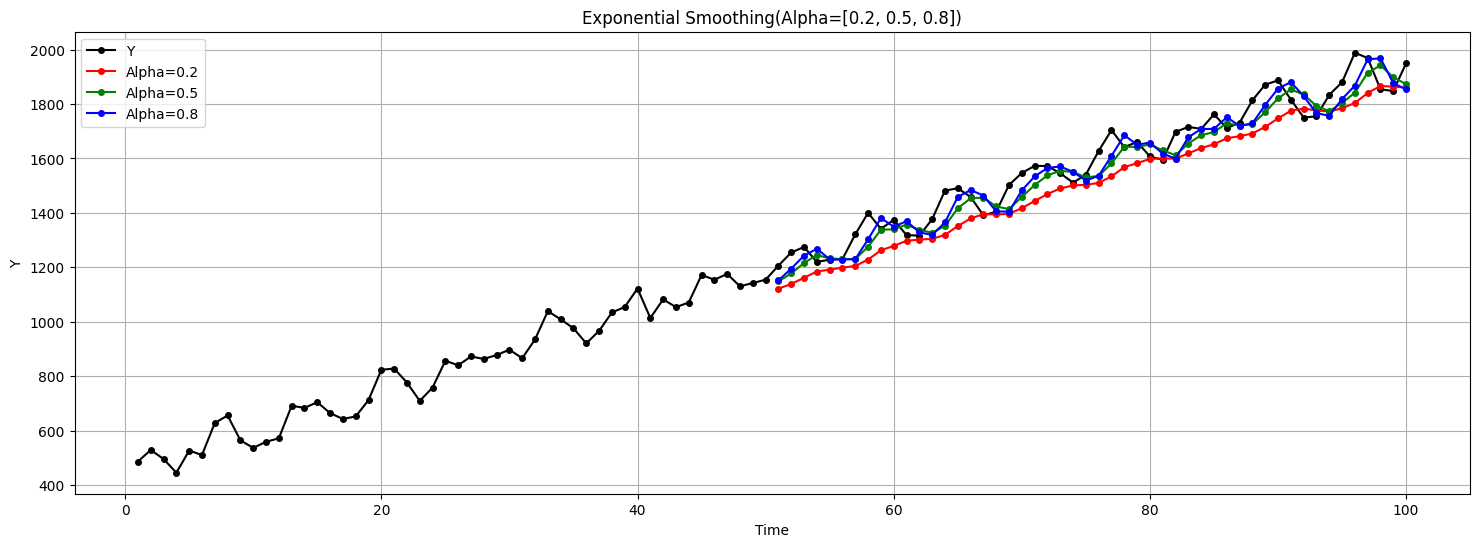

In [84]:
# Exponential Smoothing

# Exponential Smoothing for different alpha values
alphas = [0.2, 0.5, 0.8]
colors = ["ro", "go", "bo"]
plt.figure(5, figsize=(18, 6))
plt.plot(t, Y, "k-o", label="Y", markersize=4)

for alpha, color in zip(alphas, colors):
    Y_exp_smooth = np.copy(Y)
    for i in range(N - 1):
        Y_exp_smooth[i + 1] = alpha * Y[i] + (1 - alpha) * Y_exp_smooth[i]
    # plt.plot(t, Y_exp_smooth, f'-{color}', label=f'Alpha={alpha}', markersize=4)
    plt.plot(t[N2:], Y_exp_smooth[N2:], f"-{color}", label=f"Alpha={alpha}", markersize=4)

plt.grid(True)
plt.title(f"Exponential Smoothing(Alpha={alphas})")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

Mean of known values: 828.81
Variance of known values: 47619.80
Pearson correlation coefficient: 0.98


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


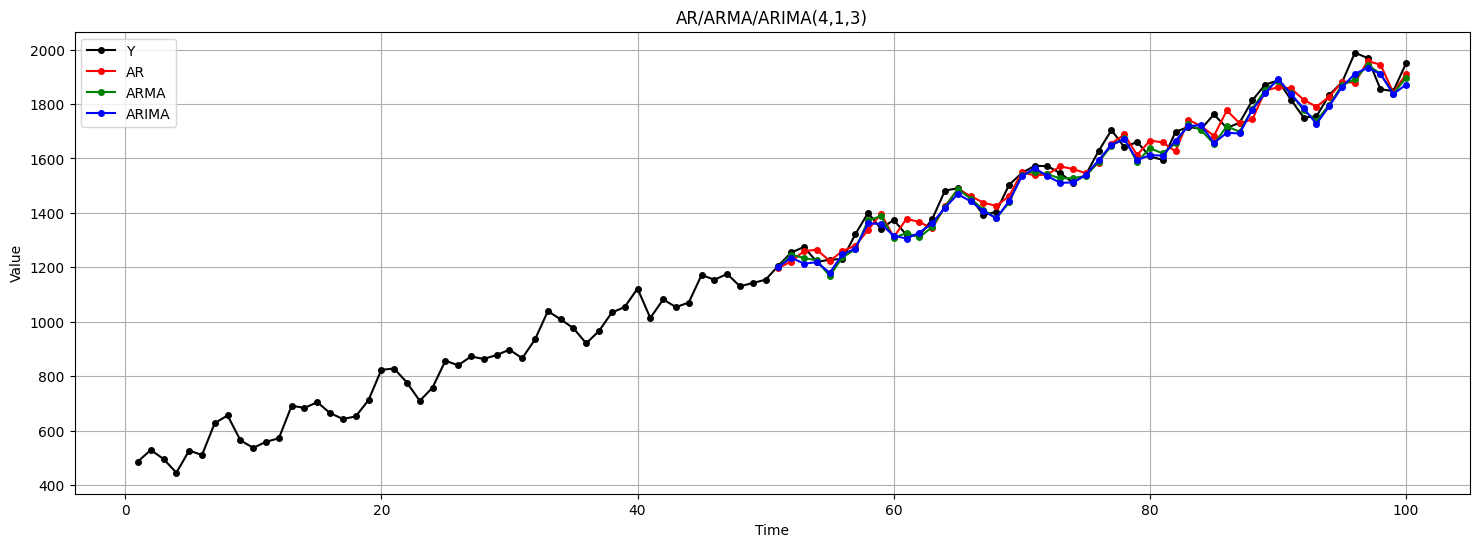

In [85]:
H = N - N2  # forecast horizon
data = Y

# Split the data
data_known = Y[:N2]
data_full = Y

p = 4  # AR order
q = 3  # MA order
d = 1  # Differencing order

# Calculate mean and variance
YY_avg = np.mean(Y[:N2])  # Mean of the known values
D = np.var(Y[:N2], ddof=0)  # Variance of the known values

# Calculate autocorrelation
corr = correlate(Y[:N2] - np.mean(Y[:N2]), Y[:N2] - np.mean(Y[:N2]), mode="full")
corr = corr / np.max(corr)  # Normalize autocorrelation

# Calculate Pearson correlation coefficient
t2 = np.arange(1, N2 + 1)
P = np.corrcoef(t2, Y[:N2])[0, 1]

# Print statistics
print(f"Mean of known values: {YY_avg:.2f}")
print(f"Variance of known values: {D:.2f}")
print(f"Pearson correlation coefficient: {P:.2f}")

# AR model
ar_model = AutoReg(data_full, lags=p)
ar_result = ar_model.fit()
ar_forecast = ar_result.predict(start=N2, end=N2 + H - 1)

# ARMA model
arma_model = ARIMA(data_full, order=(p, 0, q))
arma_result = arma_model.fit()
arma_forecast = arma_result.predict(start=N2, end=N2 + H - 1)

# ARIMA model
arima_model = ARIMA(data_full, order=(p, d, q))
arima_result = arima_model.fit()
arima_forecast = arima_result.predict(start=N2, end=N2 + H - 1)

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(np.arange(1, len(data_full) + 1), data_full, "k-o", label="Y", markersize=4)  # Known data
plt.plot(np.arange(N2 + 1, N2 + H + 1), ar_forecast, "r-o", label="AR", markersize=4)  # AR forecast
plt.plot(np.arange(N2 + 1, N2 + H + 1), arma_forecast, "g-o", label="ARMA", markersize=4)  # ARMA forecast
plt.plot(np.arange(N2 + 1, N2 + H + 1), arima_forecast, "b-o", label="ARIMA", markersize=4)  # ARIMA forecast
plt.legend()
plt.grid(True)
plt.title(f"AR/ARMA/ARIMA({p},{d},{q})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
